In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure2'
misc.get_or_create_subdir(figdir)

'/mnt/home/szheng/ceph/place_variability/fig/paper/figure2'

In [1]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [4]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [5]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

spk_beh_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m

In [7]:
import statannotations

# prep data

In [8]:
import behavior_and_switching as bas
reload(bas)

var_per_trial_pos_all = bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,var_bin_d={'lin_binned':np.array([0,15,74,111,185,202,222])/2.2},combine_first_last_section=True)


/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)
/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_per_trial_pos_all[f'{y_key}_div_n_field'] = var_per_trial_pos_all[y_key] / var_per_trial_pos_all['n_field']
/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.

# spatial

In [13]:
y_key =  'sw_on'
y_key_l = ['sw_on','sw_off']
# n_sw_per_pos=var_per_trial_pos_all.set_index('lin_binned_cat',append=True).groupby(level=(0,1,2,3))[y_key_l].sum()
n_sw_per_pos = var_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x.groupby('lin_binned_cat',group_keys=False)[y_key_l].sum())

n_field_per_pos=var_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x.groupby('lin_binned_cat',group_keys=False)['n_field'].mean()).stack()

# n_field_per_pos=var_per_trial_pos_all.set_index('lin_binned_cat',append=True).groupby(level=(0,1,2,3))['n_field'].mean()

n_field_per_pos = pd.DataFrame(n_field_per_pos.values,index=n_field_per_pos.index,columns=['n_field'])

var_per_pos = pd.concat([n_sw_per_pos,n_field_per_pos],axis=1)

var_per_pos=var_per_pos.reset_index('lin_binned_cat')
var_per_pos['lin_binned_cat'] = var_per_pos['lin_binned_cat'].astype('category')

In [14]:
# normalize by n field
for y_key in y_key_l:
    var_per_pos[f'{y_key}_div_n_field'] = var_per_pos[y_key] / var_per_pos['n_field']
    var_per_trial_pos_all[f'{y_key}_div_n_field'] = var_per_trial_pos_all[y_key] / var_per_trial_pos_all['n_field']

In [9]:
var_per_pos

lin_binned_cat  sw_on  sw_off  n_field  \
                         task_index                                          
e13_16f1 e13_16f1_210302 0                       0    4.0     5.0     70.0   
                         0                       1    6.0     5.0     48.0   
                         0                       2   13.0     6.0     86.0   
                         0                       3   18.0    11.0     94.0   
                         0                       4    3.0     2.0     26.0   
...                                            ...    ...     ...      ...   
e16_3m2  e16_3m2_211213  0                       0    4.0     7.0     79.0   
                         0                       1    8.0     8.0     60.0   
                         0                       2   12.0    12.0     58.0   
                         0                       3   15.0    15.0    110.0   
                         0                       4    3.0     6.0     28.0   

                                     sw_on_div_n_field  sw_off_div_n_field  
                         task_index                                         
e13_16f1 e13_16f1_210302 0                    0.057143            0.071429  
                         0                    0.125000            0.104167  
                         0                    0.151163            0.069767  
                         0                    0.191489            0.117021  
                         0                    0.115385            0.076923  
...                                                ...                 ...  
e16_3m2  e16_3m2_211213  0                    0.050633            0.088608  
                         0                    0.133333            0.133333  
                         0                    0.206897            0.206897  
                         0                    0.136364            0.136364  
                         0                    0.107143            0.214286  

[230 rows x 6 columns]

# spatial within animal

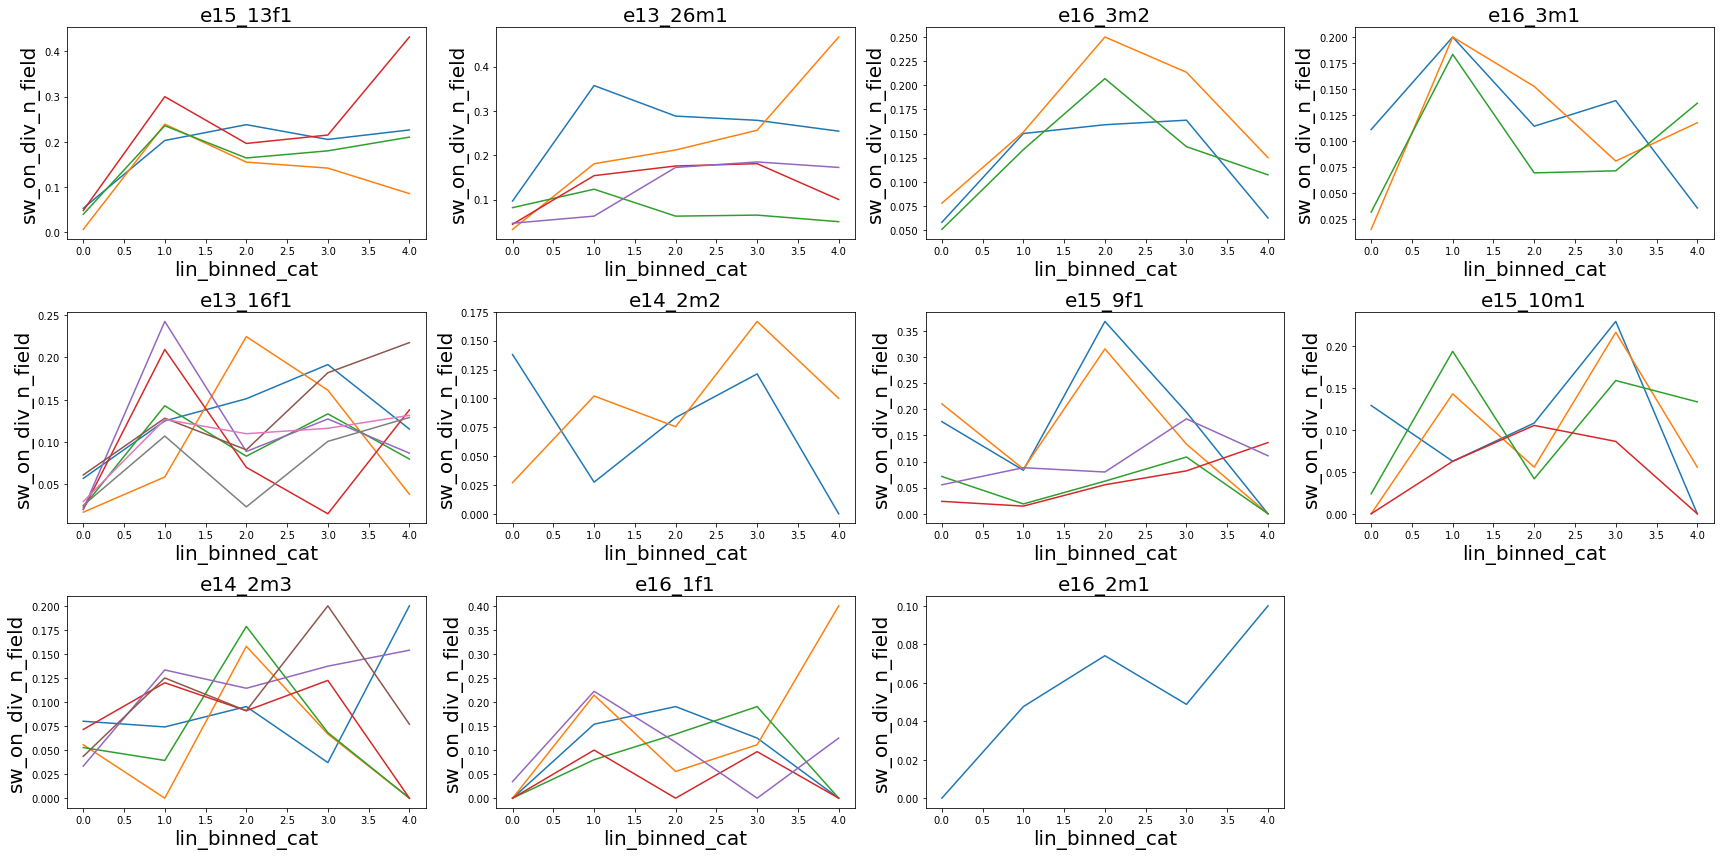

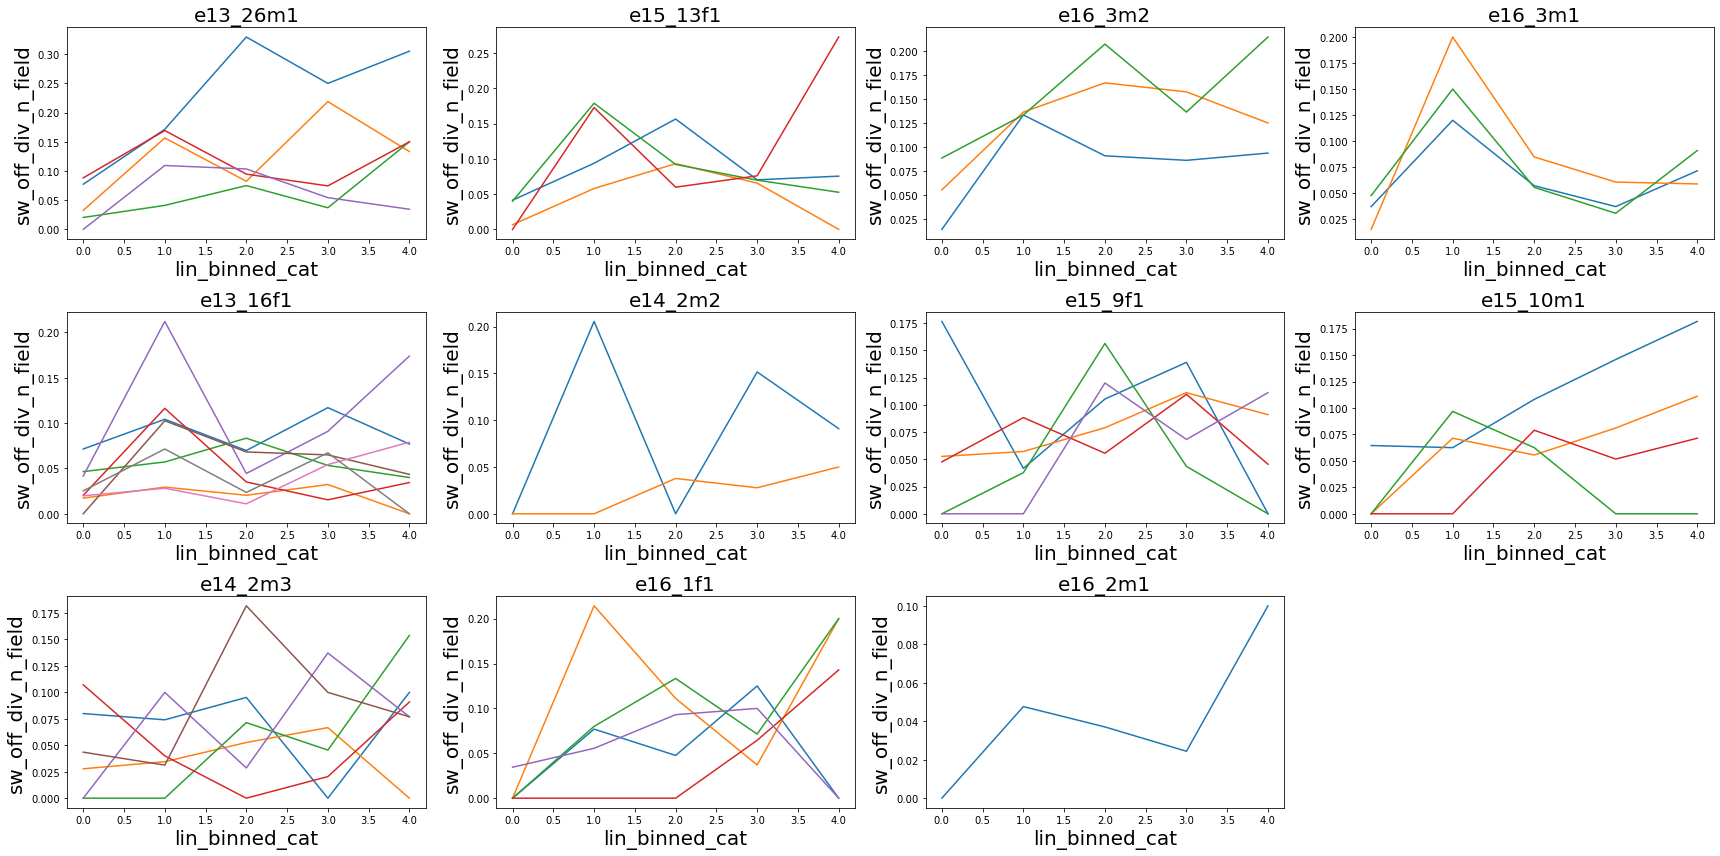

In [10]:
# y_key = 'sw_on'
for y_key in ['sw_on','sw_off']:
    ani_sorted=var_per_pos.groupby(level=0)[y_key].mean().sort_values(ascending=False).index

    gpb=var_per_pos.groupby(level=0)
    nplots=len(gpb)
    fig,axs=ph.subplots_wrapper(nplots)
    for ax in axs.ravel():
        ax.set_axis_off()
    # for ii,(ani,val) in enumerate(gpb):
    for ii, ani in enumerate(ani_sorted):
        val = gpb.get_group(ani)
        ax=axs.ravel()[ii]
        ax.set_axis_on()
        sns.lineplot(data=val.reset_index(),x='lin_binned_cat',y=f'{y_key}_div_n_field',ax=ax,hue='level_1',legend=None)
        ax.set_title(ani)
    plt.tight_layout()

    fn = f'{y_key}_div_n_field_vs_lin_binned_cat_all_ani.svg'
    fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')

# cluster for spatial per session

In [11]:
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import cluster_analysis as ca
import cluster_plot as cp

In [12]:
y_key = 'sw_on_div_n_field'#'sw_on_div_n_field'
y_per_sess = var_per_pos.set_index('lin_binned_cat',append=True)[y_key].unstack()
y_per_sess_norm = y_per_sess / y_per_sess.sum(axis=1).values[:,None]

# model = BayesianGaussianMixture(n_components=10,weight_concentration_prior_type='dirichlet_process',weight_concentration_prior=2.)
model=KMeans(n_clusters=8)
# model = GaussianMixture(n_components=10)
clust = model.fit_predict(y_per_sess_norm)





In [13]:
%%time
n_repeats = 30#30#100
X_normed_ = y_per_sess_norm
# X_normed_null = [X_normed.sample(X_normed.shape[0],replace=True) for _ in range(n_repeats)]
X_normed_null = ca.sample_null(X_normed_,n_repeats=n_repeats)
n_clusters_l=np.arange(10)+1#np.arange(0,22,1)+1
k_hat,test_stats, gap_k, w_k_l, w_null_k_b_l,s_k = ca.get_gap_stat(X_normed_null,X_normed_,n_clusters_l=n_clusters_l)


CPU times: user 19.1 s, sys: 287 ms, total: 19.4 s
Wall time: 6.25 s


(<Figure size 432x288 with 2 Axes>,
 <Axes: xlabel='num. clusters', ylabel='gap stats'>,
 <Axes: ylabel='difference'>)

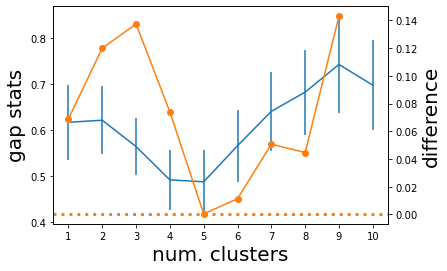

In [14]:
cp.plot_gap_test(n_clusters_l,gap_k, s_k, test_stats,fig=None,ax=None)

In [15]:
# clust with wasserstein
# y_per_sess_norm_val = y_per_sess_norm.values
# was_dist=np.zeros((y_per_sess_norm_val.shape[0],y_per_sess_norm_val.shape[0]))
# for i in range(y_per_sess_norm_val.shape[0]):
#     u = y_per_sess_norm_val[i]
#     for j in range(i,y_per_sess_norm_val.shape[0]):
#         v = y_per_sess_norm_val[j]
#         was_dist[i,j] = scipy.stats.wasserstein_distance(u,v)
# was_dist = was_dist + was_dist.T
# model=AgglomerativeClustering(n_clusters=7,affinity="precomputed",linkage='complete')
# clust =model.fit_predict(was_dist)


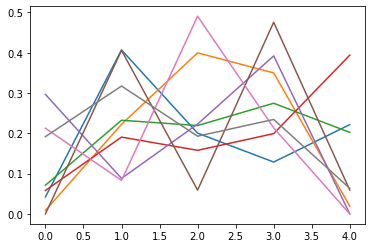

In [16]:
plt.plot(model.cluster_centers_.T)

In [17]:
value_cols = y_per_sess_norm.columns
y_per_sess_norm_fitted = copy.copy(y_per_sess_norm)
y_per_sess_norm_fitted['clust'] = clust


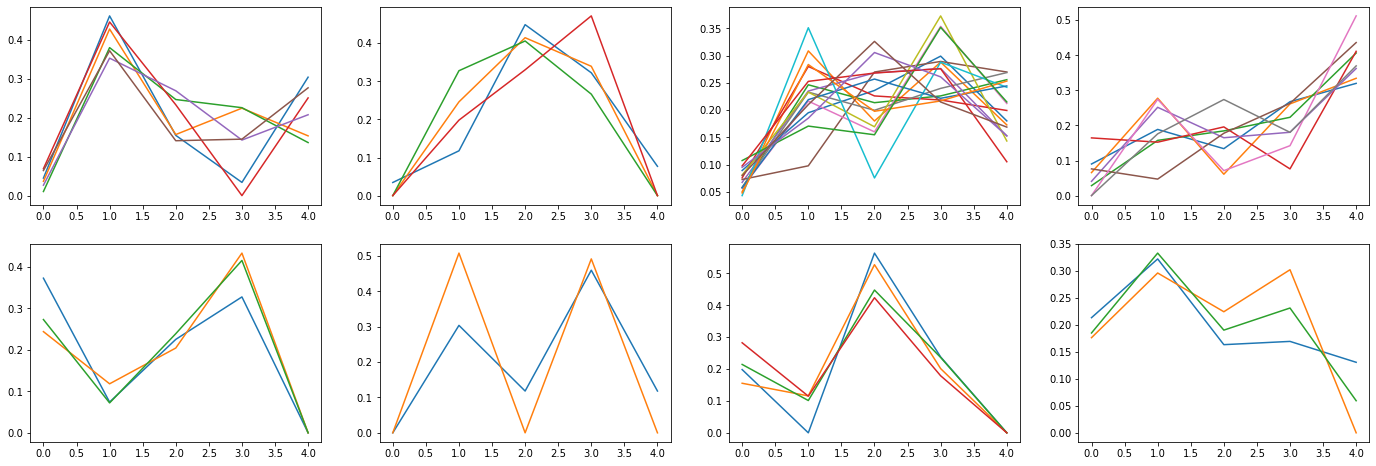

In [18]:
gpb=y_per_sess_norm_fitted.groupby('clust')
nplots = len(gpb)
fig,axs=ph.subplots_wrapper(nplots)
for ii,(k,val) in enumerate(gpb):
    ax=axs.ravel()[ii]
    ax.plot(val[value_cols].T)

In [19]:
meta_info_per_sess = subdb[['animal_name.1','sess_name','performance','ntrials','n_pyr_putative']].set_index(['animal_name.1','sess_name'])



meta_info_per_sess.index.names = ['ani','sess']
y_per_sess_norm_fitted.index.names=['ani','sess','task_index']

meta_info_per_sess_with_clust=meta_info_per_sess.join(y_per_sess_norm_fitted['clust'])

In [20]:
meta_info_with_clust_agg = meta_info_per_sess_with_clust.groupby('clust').agg(['std','mean'])

meta_info_with_clust_agg['n_animal'] =meta_info_per_sess_with_clust.groupby('clust').apply(lambda x:x.index.get_level_values(0).nunique())
meta_info_with_clust_agg['n_sess']=meta_info_per_sess_with_clust.groupby('clust').apply(lambda x:x.shape[0])

In [21]:
meta_info_with_clust_agg

performance              ntrials            n_pyr_putative              \
              std      mean        std       mean            std        mean   
clust                                                                          
0        0.107123  0.836606   2.857738  24.833333      89.309387  149.166667   
1        0.185520  0.784167   2.217356  21.750000      27.183022   80.250000   
2        0.111618  0.792192  15.303594  32.750000     104.232433  161.500000   
3        0.112650  0.772246  19.631880  33.375000      81.096063  116.500000   
4        0.032784  0.866972   3.214550  22.333333       4.041452   66.333333   
5        0.133003  0.855952   0.707107  20.500000       2.121320   48.500000   
6        0.087558  0.822373   4.193249  22.750000       7.702813   47.000000   
7        0.044918  0.840556   2.645751  23.000000      58.103356  117.000000   

      n_animal n_sess  
                       
clust                  
0            4      6  
1            3      4  
2            8     16  
3            7      8  
4            3      3  
5            2      2  
6            2      4  
7            3      3

# spatial agg 

In [10]:
import behavior_and_switching_plot as basp
reload(basp)

<module 'behavior_and_switching_plot' from '/mnt/home/szheng/projects/place_variability/code/behavior_and_switching_plot.py'>

In [11]:
segment_names =['delay zone','central','T','return side','return pre delay zone']

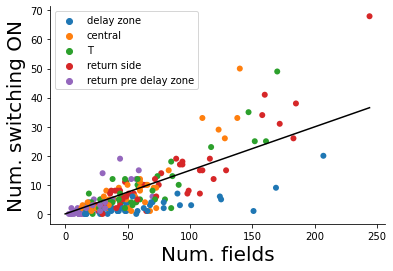

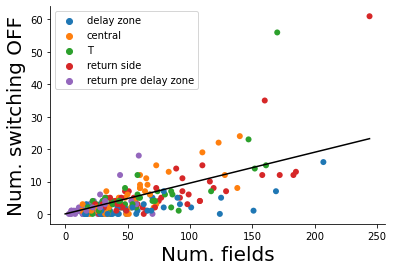

In [15]:
x_key='n_field'
for onoff in ['on','off']:
    y_key=f'sw_{onoff}'
    hue='lin_binned_cat'
    fig,ax=basp.plot_scatter_with_slope(var_per_pos,x_key,y_key,hue,legend_text=segment_names)
    ax.set_ylabel(f'Num. switching {onoff.upper()}')
    ax.set_xlabel('Num. fields')

    fn=f'{y_key}_vs_{x_key}.svg'
    fig.savefig(os.path.join(figdir,fn))

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statannotations.Annotator import Annotator
import re

In [20]:
def refine_tick_labels(inds,lin_cat_map=None):
    if lin_cat_map is None:
#         lin_cat_map = ['Home','Central','T','Return side','Return pre home']
        lin_cat_map = ['Delay zone','Central','T','Return side','Return pre delay zone']
    refine_label_map = {'n_field':'Num. fields','trial_z':'Trial','speed_z':'Speed'}
    label_l = []
    for k in inds:
        if 'lin' in k:
            pattern = r"lin.*?\[T\.(.*?)\]"
            matches = re.findall(pattern, k)
            label = lin_cat_map[int(matches[0])]
            label_l.append(label)
        else:
            label=refine_label_map[k]
            label_l.append(label)
    return label_l
            
            
            

In [21]:
X = var_per_trial_pos_all

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:3.364e-02
1 vs. 2: Custom statistical test, P_val:1.805e-04
0 vs. 3: Custom statistical test, P_val:5.008e-08
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:3.268e-02
1 vs. 2: Custom statistical test, P_val:5.004e-01
2 vs. 3: Custom statistical test, P_val:8.545e-03


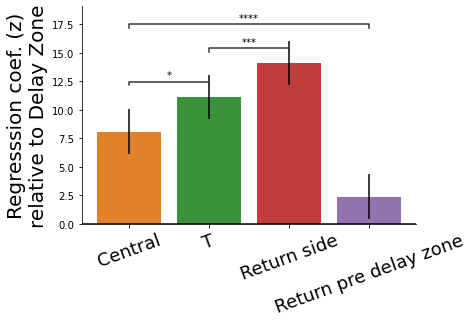

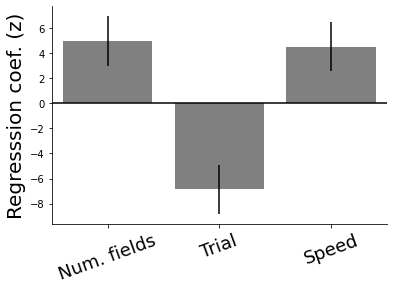

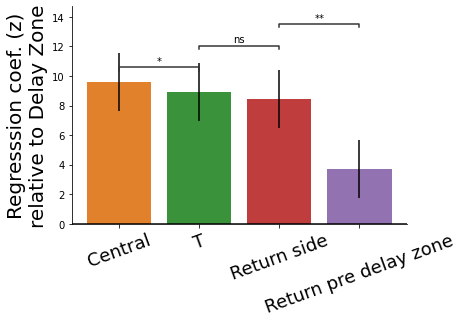

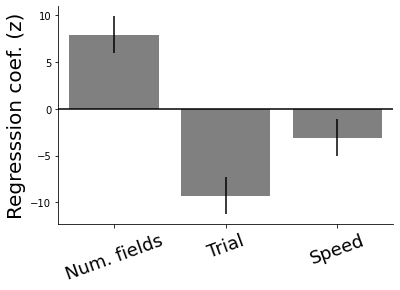

In [22]:
annot_pairs_l = [['2-1','3-2','4-1'],['2-1','3-2','4-3']]
for y_key,annot_pairs in zip(['sw_on','sw_off'],annot_pairs_l):
# y_key ='sw_on'
    formula=f"{y_key}~C(animal)+C(lin_binned_cat)+n_field+trial_z+speed_z"
    model=smf.glm(formula=formula,data=X,family=sm.families.Poisson(sm.families.links.Log()))
    res=model.fit()
    fitted_par = res.tvalues

    ma =np.logical_not(fitted_par.index.str.contains('animal') | fitted_par.index.str.contains('Intercept'))
    val=fitted_par.loc[ma]
    annot_data=val.to_frame().reset_index().reset_index().rename({'level_0':'ind','index':'regressor',0:'weight'},axis=1)

    ttest_res=res.t_test_pairwise('C(lin_binned_cat)').result_frame
    # ttest_res=ttest_res.loc[['2-1','3-2','4-1']]
    ttest_res=ttest_res.loc[annot_pairs]


    pairs=np.array([[int(i) for i in s.split('-')] for s in ttest_res.index])
    pairs = pairs - 1

    pos_ma=annot_data['regressor'].str.contains('lin')
    annot_data_pos = annot_data.loc[pos_ma]
    annot_data_non_pos = annot_data.loc[~pos_ma]

    fig,ax=plt.subplots()
    ncolors = len(segment_names)
    colors = [f'C{i}' for i in np.arange(ncolors)]
    colors = colors[1:]
    # ax=sns.barplot(x='ind',y='weight',data=annot_data_pos,color='C0',yerr=1.96,ax=ax)
    ax=sns.barplot(x='ind',y='weight',data=annot_data_pos,palette=colors,yerr=1.96,ax=ax)
    ax.axhline(0,color='k')
    pvalues = ttest_res['pvalue-hs']
    annotator = Annotator(ax, pairs, data=annot_data_pos,x='ind',y='weight')
    annotator.set_pvalues_and_annotate(pvalues)

    xticklabels=refine_tick_labels(annot_data_pos['regressor'],lin_cat_map=None)
    ax.set_xticklabels(xticklabels,rotation=20,fontsize=18)
    ax.set(xlabel=None,ylabel='Regresssion coef. (z)\nrelative to Delay Zone')

    fn=f'{y_key}_regress_coef_bar_spatial.svg'
    fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')

    fig,ax=plt.subplots()
    ax=sns.barplot(x='ind',y='weight',data=annot_data_non_pos,color='grey',yerr=1.96,ax=ax)
    ax.axhline(0,color='k')
    xticklabels=refine_tick_labels(annot_data_non_pos['regressor'],lin_cat_map=None)
    ax.set_xticklabels(xticklabels,rotation=20,fontsize=18)
    ax.set(xlabel=None,ylabel='Regresssion coef. (z)')

    fn=f'{y_key}_regress_coef_bar_non_spatial.svg'
    fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')


### glm diagnostics

In [29]:
# fig,axs=plt.subplots(1,3,figsize=(12,4))
# ax=axs[0]
# ax.scatter(res.mu,X[y_key])
# ax.set(xlabel='fitted',ylabel='observed')

# ax=axs[1]
# resid=res.resid_deviance
# ax.scatter(res.mu,resid)
# ax.set(xlabel='fitted',ylabel='residual deviance')

# ax=axs[2]
# resid_z=scipy.stats.zscore(resid)
# ax.hist(resid_z)

In [30]:
# seperate the spatial and non spatial variables

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:3.268e-02
1 vs. 2: Custom statistical test, P_val:5.004e-01
2 vs. 3: Custom statistical test, P_val:8.545e-03


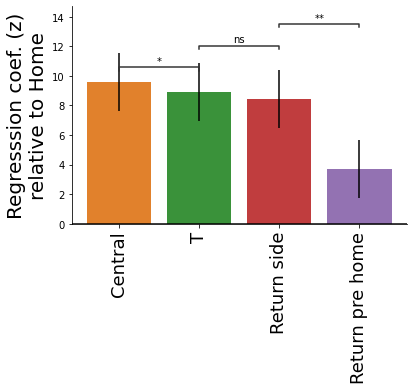

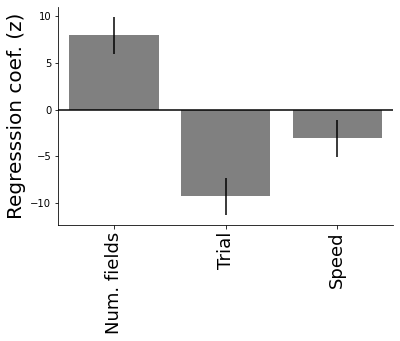

In [31]:
y_key ='sw_off'
formula=f"{y_key}~C(animal)+C(lin_binned_cat)+n_field+trial_z+speed_z"
model=smf.glm(formula=formula,data=X,family=sm.families.Poisson(sm.families.links.Log()))
res=model.fit()
fitted_par = res.tvalues

ma =np.logical_not(fitted_par.index.str.contains('animal') | fitted_par.index.str.contains('Intercept'))
val=fitted_par.loc[ma]
annot_data=val.to_frame().reset_index().reset_index().rename({'level_0':'ind','index':'regressor',0:'weight'},axis=1)

ttest_res=res.t_test_pairwise('C(lin_binned_cat)').result_frame
ttest_res=ttest_res.loc[['2-1','3-2','4-3']]

pairs=np.array([[int(i) for i in s.split('-')] for s in ttest_res.index])
pairs = pairs - 1

pos_ma=annot_data['regressor'].str.contains('lin')
annot_data_pos = annot_data.loc[pos_ma]
annot_data_non_pos = annot_data.loc[~pos_ma]

fig,ax=plt.subplots()
ncolors = len(segment_names)
colors = [f'C{i}' for i in np.arange(ncolors)]
colors = colors[1:]
# ax=sns.barplot(x='ind',y='weight',data=annot_data_pos,color='C0',yerr=1.96,ax=ax)
ax=sns.barplot(x='ind',y='weight',data=annot_data_pos,palette=colors,yerr=1.96,ax=ax)
ax.axhline(0,color='k')
pvalues = ttest_res['pvalue-hs']
annotator = Annotator(ax, pairs, data=annot_data_pos,x='ind',y='weight')
annotator.set_pvalues_and_annotate(pvalues)

xticklabels=refine_tick_labels(annot_data_pos['regressor'],lin_cat_map=None)
ax.set_xticklabels(xticklabels,rotation=90,fontsize=18)
ax.set(xlabel=None,ylabel='Regresssion coef. (z)\nrelative to Home')

fn=f'{y_key}_regress_coef_bar_spatial.svg'
fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')

fig,ax=plt.subplots()
ax=sns.barplot(x='ind',y='weight',data=annot_data_non_pos,color='grey',yerr=1.96,ax=ax)
ax.axhline(0,color='k')
xticklabels=refine_tick_labels(annot_data_non_pos['regressor'],lin_cat_map=None)
ax.set_xticklabels(xticklabels,rotation=90,fontsize=18)
ax.set(xlabel=None,ylabel='Regresssion coef. (z)')

fn=f'{y_key}_regress_coef_bar_non_spatial.svg'
fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')


In [32]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# #calculate VIF for each predictor variable 
# vif = [variance_inflation_factor(model.exog, i) for i in range(model.exog.shape[1])]

# vif

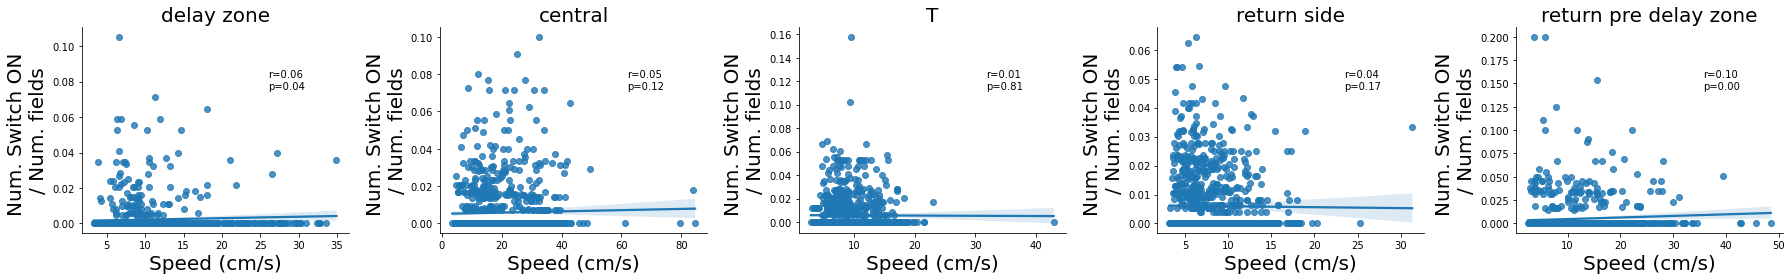

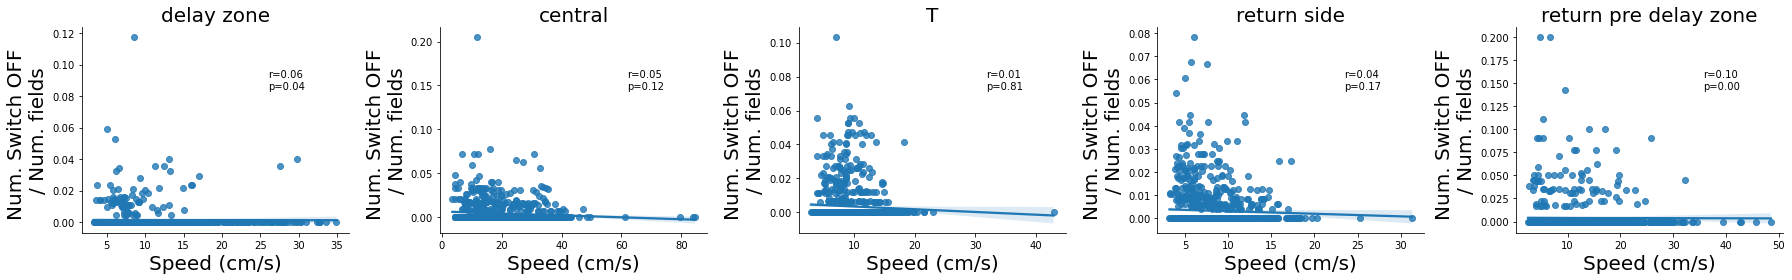

In [23]:
gpb=var_per_trial_pos_all.groupby('lin_binned_cat')

for onoff_str in ['on','off']:
# onoff_str = 'on'
    fig,axs=plt.subplots(1,5,figsize=(5*5,4))
    for ii,(k,val) in enumerate(gpb):
        ax=axs.ravel()[ii]
        sns.regplot(data=val,x='speed_gauss',y=f'sw_{onoff_str}_div_n_field',ax=ax) # show actual speed, compute rho using z scored within session?
    #     rho,pval=scipy.stats.pearsonr(val['speed_z'],val['sw_on_div_n_field'])
        rho,pval=scipy.stats.spearmanr(val['speed_z'],val['sw_on_div_n_field'])
        r_str=f'r={rho:.02f}\np={pval:.02f}'
        ax.annotate(r_str,xy=(0.7,0.7),xycoords='axes fraction')
        ax.set_title(segment_names[ii])
        ax.set_ylabel(f'Num. Switch {onoff_str.upper()} \n/ Num. fields')
        ax.set(xlabel='Speed (cm/s)')
    plt.tight_layout()

    fn = f'sw_{onoff_str}_div_n_field_vs_speed_seperate_lin_binned_cat.svg'
    fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')

# vs trial

In [34]:
var_per_trial_pos_all

trial  lin_binned_cat  speed_gauss  \
                         task_index                                       
e13_16f1 e13_16f1_210302 0             4.0               0     3.651214   
                         0             4.0               1     6.243967   
                         0             4.0               2     5.085595   
                         0             4.0               3     3.995462   
                         0             4.0               4     3.700580   
...                                    ...             ...          ...   
e16_3m2  e16_3m2_211213  0            26.0               0     6.034539   
                         0            26.0               1     7.388164   
                         0            26.0               2    10.247094   
                         0            26.0               3     5.821348   
                         0            26.0               4     6.402528   

                                     occupancy  n_field  sw_on  sw_off  \
                         task_index                                      
e13_16f1 e13_16f1_210302 0           10.966667       70    0.0     1.0   
                         0            8.200000       48    1.0     0.0   
                         0           12.766667       86    3.0     0.0   
                         0           30.533334       94    1.0     0.0   
                         0            5.566667       26    1.0     1.0   
...                                        ...      ...    ...     ...   
e16_3m2  e16_3m2_211213  0           12.366667       79    0.0     0.0   
                         0            7.766667       60    0.0     0.0   
                         0            3.833333       58    0.0     0.0   
                         0           10.466667      110    0.0     0.0   
                         0            2.233333       28    0.0     0.0   

                                       animal          session   speed_z  \
                         task_index                                        
e13_16f1 e13_16f1_210302 0           e13_16f1  e13_16f1_210302 -0.740101   
                         0           e13_16f1  e13_16f1_210302  0.072035   
                         0           e13_16f1  e13_16f1_210302 -0.290805   
                         0           e13_16f1  e13_16f1_210302 -0.632272   
                         0           e13_16f1  e13_16f1_210302 -0.724638   
...                                       ...              ...       ...   
e16_3m2  e16_3m2_211213  0            e16_3m2   e16_3m2_211213 -0.876229   
                         0            e16_3m2   e16_3m2_211213 -0.484304   
                         0            e16_3m2   e16_3m2_211213  0.343462   
                         0            e16_3m2   e16_3m2_211213 -0.937956   
                         0            e16_3m2   e16_3m2_211213 -0.769683   

                                      trial_z  sw_on_div_n_field  \
                         task_index                                
e13_16f1 e13_16f1_210302 0          -1.024544           0.000000   
                         0          -1.024544           0.020833   
                         0          -1.024544           0.034884   
                         0          -1.024544           0.010638   
                         0          -1.024544           0.038462   
...                                       ...                ...   
e16_3m2  e16_3m2_211213  0           1.669046           0.000000   
                         0           1.669046           0.000000   
                         0           1.669046           0.000000   
                         0           1.669046           0.000000   
                         0           1.669046           0.000000   

                                     sw_off_div_n_field  
                         task_index                      
e13_16f1 e13_16f1_210302 0                     0.014286  
                         0                     0.0

In [24]:
y_key_l = ['sw_on','sw_off','sw_on_div_n_field','sw_off_div_n_field']
var_per_trial=var_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x.groupby('trial')[y_key_l].sum())
to_add= var_per_trial_pos_all.groupby(level=(0,1,2)).apply(lambda x:x.groupby('trial')[['trial_z','speed_z']].mean())
var_per_trial =pd.concat([var_per_trial ,to_add],axis=1)


In [36]:
var_per_trial

sw_on  sw_off  sw_on_div_n_field  \
                         task_index trial                                     
e13_16f1 e13_16f1_210302 0          4.0      6.0     2.0           0.104817   
                                    5.0      1.0     5.0           0.011628   
                                    6.0      4.0     0.0           0.081561   
                                    7.0      3.0     0.0           0.036552   
                                    8.0      1.0     2.0           0.010638   
...                                          ...     ...                ...   
e16_3m2  e16_3m2_211213  0          22.0     0.0     3.0           0.000000   
                                    23.0     2.0     3.0           0.025758   
                                    24.0     1.0     1.0           0.035714   
                                    25.0     0.0     0.0           0.000000   
                                    26.0     0.0     0.0           0.000000   

                                           sw_off_div_n_field   trial_z  \
                         task_index trial                                 
e13_16f1 e13_16f1_210302 0          4.0              0.052747 -1.024544   
                                    5.0              0.057829 -0.866921   
                                    6.0              0.000000 -0.709299   
                                    7.0              0.000000 -0.551677   
                                    8.0              0.032461 -0.394055   
...                                                       ...       ...   
e16_3m2  e16_3m2_211213  0          22.0             0.053896  1.155493   
                                    23.0             0.057463  1.283881   
                                    24.0             0.035714  1.412270   
                                    25.0             0.000000  1.540658   
                                    26.0             0.000000  1.669046   

                                            speed_z  
                         task_index trial            
e13_16f1 e13_16f1_210302 0          4.0   -0.463156  
                                    5.0    0.116439  
                                    6.0   -0.427633  
                                    7.0   -0.135316  
                                    8.0    0.019959  
...                                             ...  
e16_3m2  e16_3m2_211213  0          22.0   0.438230  
                                    23.0  -0.179591  
                                    24.0   0.155454  
                                    25.0  -0.234340  
                                    26.0  -0.544942  

[1066 rows x 6 columns]

In [25]:
# var per trial pos for NOVEL!
reload(bas)
# var_bin_d = {'lin_binned':np.array([0,15,44.5,74,92.5,111,148,185,202,222])/2.2} # doesn't really matter here since we only look at trial here, but kept for testing if it actually doesn't matter
var_bin_d = {'lin_binned':np.array([0,15,74,111,185,222])/2.2} # doesn't really matter here since we only look at trial here, but kept for testing if it actually doesn't matter
var_per_trial_pos_all_novel=bas.prep_regression(spk_beh_df_all,all_fields_recombined_all,all_sw_d_all,task_index=1,var_bin_d=var_bin_d)


reload(bas)
var_per_trial_novel = bas.agg_within_trial(var_per_trial_pos_all_novel)

/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k_cat] = pd.cut(df[k],val,retbins=False,labels=False,include_lowest=True)
/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_per_trial_pos_all[f'{y_key}_div_n_field'] = var_per_trial_pos_all[y_key] / var_per_trial_pos_all['n_field']
/mnt/home/szheng/projects/place_variability/code/behavior_and_switching.

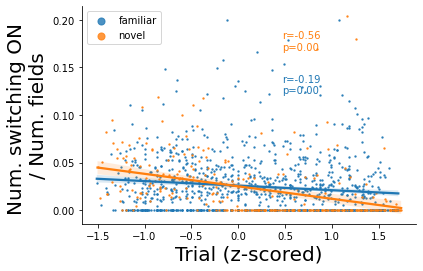

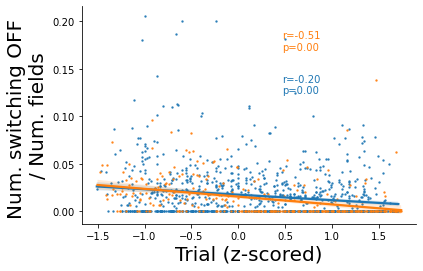

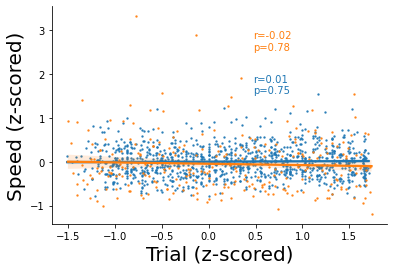

In [26]:
# for y_key in ['sw_on','sw_off']:
xlabel = 'Trial (z-scored)'
ylabel_l=['Num. switching ON \n/ Num. fields','Num. switching OFF \n/ Num. fields','Speed (z-scored)']
for ii,y_key in enumerate(['sw_on_div_n_field','sw_off_div_n_field','speed_z']):
    fig,ax=plt.subplots()
    for jj,(toplot,label) in enumerate(zip([var_per_trial,var_per_trial_novel],['familiar','novel'])):
    
        ax=sns.regplot(data=toplot,x='trial_z',y=y_key,scatter_kws={'s':2},ax=ax,label=label)
        ylabel = ylabel_l[ii]
        ax.set(ylabel=ylabel,xlabel=xlabel)

        rho,pval=scipy.stats.spearmanr(toplot['trial_z'],toplot[y_key])
        r_str=f'r={rho:.02f}\np={pval:.02f}'
        ax.annotate(r_str,xy=(0.6,0.6+0.2*jj),xycoords='axes fraction',color=f'C{jj}')
    if ii==0:
        ax.legend(markerscale=5)

    fn = f'{y_key}_vs_trial_z_fam_novel.svg'
    fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')




# regression selection

In [39]:
reload(bas)
key_l = np.array(['animal','lin_binned_cat','n_field','trial_z','speed_z','C(animal):C(lin_binned_cat)'])
cat_l = np.array([True,True,False,False,False,False,False])
# combo_l = [[0,1,2,3,4,5],[0,1,2,3,4],[0,1,2,3],[0,1,2],[0,1,3],[0,2,3],[0,1],[0,2]]#None#[[0,1,2,3,4],[0,1,2,3],[1,2,4],[1,2],[1]]
combo_l = [[0,1,2,3,4],[0,1,2,3],[0,1,2,4],[0,1,3,4],[0,2,3,4],[1,2,3,4]]
formula_shorthand = ['Full','w/o Speed','w/o Trial','w/o N field','w/o Position','w/o Animal']
y_key = 'sw_on'
formula_l=bas.build_formula_multiple(key_l,cat_l,y_key,combo_l=combo_l)


In [40]:
%%time
reload(bas)

y_key = 'sw_on'
sc_l_all_l_d = {}
for y_key in ['sw_on','sw_off']:
    formula_l=bas.build_formula_multiple(key_l,cat_l,y_key,combo_l=combo_l)

    n_splits = 5
    n_repeats = 10
    sc_l_all_l = []
    # X = var_per_trial_pos_all.loc[ani_l]
    X = var_per_trial_pos_all
    for n in range(n_repeats):
        sc_l_all,res_all=bas.cv_poisson_glm_multi_formula(X,formula_l,n_splits=n_splits,random_state=n)
        sc_l_all_l.append(np.median(sc_l_all,axis=1))
    if formula_shorthand is not None:
        index=formula_shorthand
    else:
        index=formula_l
    sc_l_all_l = pd.DataFrame(np.array(sc_l_all_l).T,index=index)
    sc_l_all_l_d[y_key] = sc_l_all_l
# sc_multirep_median=np.median(np.array(sc_l_all_l),axis=0)
# score_df=pd.Series(sc_multirep_median,index=formula_l)
sc_l_all_l_d=pd.concat(sc_l_all_l_d,axis=0)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: overflow encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:46: RuntimeWarning: invalid value encountered in matmul
  devp = tem

CPU times: user 3min 27s, sys: 1min 57s, total: 5min 24s
Wall time: 1min 21s


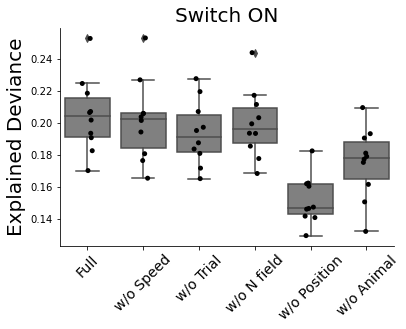

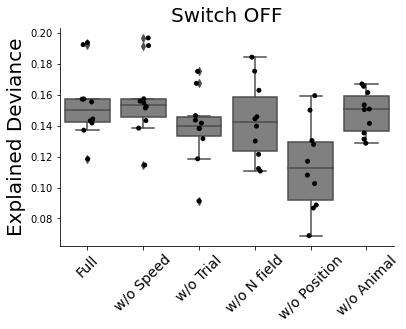

In [41]:
y_key = 'sw_on'
for onoff_str in ['on','off']:
    y_key = f'sw_{onoff_str}'
    toplot = sc_l_all_l_d.loc[y_key]
    fig,ax=plt.subplots()
    ax=sns.boxplot(data=toplot.T,color='grey',ax=ax)
    ax=sns.stripplot(data=toplot.T,color='k',ax=ax)
    # toplot.plot(legend=False,linestyle=':',color='k',ax=ax)
    ax.set(ylabel='Explained Deviance')
    xticklabels=ax.get_xticklabels()
    ax.set_xticklabels(xticklabels,fontsize=14,rotation=45)
    ax.set_title(f'Switch {onoff_str.upper()}')
    
    fn=f'held_out_d2_vs_model_{y_key}.svg'
    fig.savefig(os.path.join(figdir,fn),bbox_inches='tight')
    

# funny behavior map

# visualize switching and headscan events on maze

In [27]:
# get the x y for all switches, one location counted once per trial
from scipy.interpolate import interp1d

task_index=0
all_sw_d_all_fam = all_sw_d_all.loc[(slice(None),slice(None),task_index)]
all_sw_gpb = all_sw_d_all_fam.groupby(level=(0,1))


all_sw_xy_d_all = {}
for k,all_sw_sub in all_sw_gpb:
    data = spk_beh_df_all.loc[k].query('task_index==@task_index')
    lin_to_xy_trial =data.groupby('trial').apply(lambda x:interp1d(x['lin_binned'].values,x[['x','y']].values,axis=0,fill_value='extrapolate'))
    gpb =  all_sw_sub.groupby('trial_index')
    all_sw_xy_d = {}
    for onoff in [1,-1]:
        all_sw_xy = []
        for tr, val in gpb:
            lin_one_trial = np.unique(val.query('switch==@onoff')['field_pos'].values)
            if len(lin_one_trial)>0:
                xy = lin_to_xy_trial.loc[tr](lin_one_trial+0.00001)
                all_sw_xy.extend(xy)
        all_sw_xy_d[onoff] = pd.DataFrame(np.array(all_sw_xy),columns=['x','y'])
    all_sw_xy_d = pd.concat(all_sw_xy_d,axis=1)
    all_sw_xy_d_all[k] =all_sw_xy_d 
all_sw_xy_d_all = pd.concat(all_sw_xy_d_all,axis=0)
            

/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:69

/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_beh_df_all.loc[k].query('task_index==@task_index')
/tmp/ipykernel_36558/3871266608.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = spk_b

In [28]:
reload(bas)
import behavior_analysis as ba
reload(ba)


# get headscan positions!!!
# only keep one per trial & position
beh_cols = spk_beh_df_all.columns.str.isnumeric()==False
beh_df_all = spk_beh_df_all.loc[:,beh_cols]

beh_df_all_fam = beh_df_all.query('task_index==0')
headscan_info_all=ba.get_event_start_info_all_sess(beh_df_all_fam,event_key='off_track_event',drop_multiple=True)

/tmp/ipykernel_36558/2237158989.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  data= spk_beh_df_all.loc[ani,sess].query('task_index==@task_index')


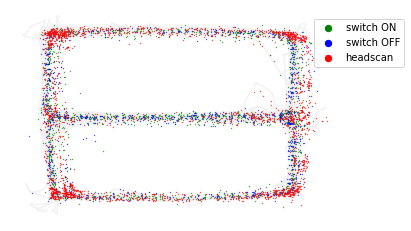

In [29]:

fig,ax=plt.subplots(figsize=(6,4))
ani,sess = 'e13_26m1','e13_26m1_210913'
task_index = 0
data= spk_beh_df_all.loc[ani,sess].query('task_index==@task_index')
# data= spk_beh_df_all.query('task_index==@task_index') # use this is slow!!
ax.plot(data['x'].values[::10],data['y'].values[::10],c='grey',alpha=0.1)

c_l = ['g','b']
onoff_str_d = {1:'switch ON',-1:'switch OFF'}
for onoff,c in zip([1,-1],c_l):
    ax.scatter(all_sw_xy_d_all[onoff,'x'],all_sw_xy_d_all[onoff,'y'],marker='o',c=c,s=0.1,label=onoff_str_d[onoff])
ax.scatter(headscan_info_all['x'],headscan_info_all['y'],marker='o',c='r',s=0.1,label='headscan')
plt.axis('off')
legend = ax.legend(markerscale=20,bbox_to_anchor=[0.9,0.7])

fn = 'switch_and_headscan_on_maze_small.svg'
fn_full = os.path.join(figdir,fn)
fig.savefig(fn_full,bbox_inches='tight')

# quantifying ratio of switching and headscan

In [30]:
segment_edges=np.array([0,15,74,111,185,202,222])/2.2
# segment_names =['home','central','T','return side','return pre home','home']
segment_names =['delay zone','central','T','return side','return pre delay zone','delay zone']


In [41]:
bax1.axs[1]

<Axes: >

[(array([ 16.,  24.,  30.,  17.,  17.,  21.,  15.,   8.,   9.,  13.,   8.,
           5.,   1.,   3.,   3.,   6.,   2.,   2.,   5.,   2.,   1.,   7.,
           0.,   7.,   2.,   3.,   9.,   5.,   4.,   3.,   4.,   6.,  16.,
          15.,  56.,  31.,  18.,  15.,   6.,  16.,  16.,  16.,  20.,   7.,
           8.,  12.,  26.,  79.,  98., 147., 242., 112.,  41.,  16.,  31.,
          24.,  14.,  27.,  21.,  20.,  29.,  20.,  20.,  22.,  22.,  14.,
          13.,  10.,  18.,  18.,  16.,  14.,   7.,  18.,  13.,  29.,  13.,
          13.,  31.,  37.,  54.,  94., 141.,  78.,  53.,  26.,  10.,   8.,
          17.,  15.,  27.,  27.,  28.,  12.,   8.,   7.,  23.,  28.,  50.,
          47.]),
  array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
         10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
         21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
         32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
        

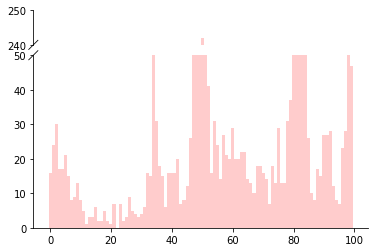

In [52]:
bax = brokenaxes(ylims=((0, 50), (240, 250)), hspace=.1)
bax.hist(headscan_pos,bins=lin_binned_bins,color='r',alpha=0.2,label='headscan')

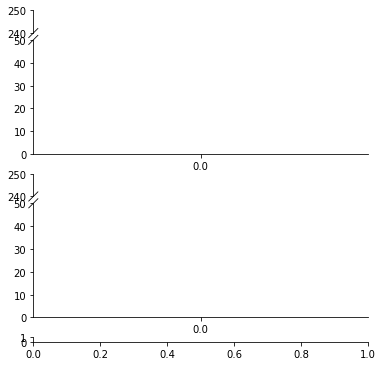

In [56]:
fig=plt.figure(figsize=(6,6.1))
sps1, sps2,sps3 = GridSpec(3,1,height_ratios=[3,3,0.1])
bax1 = brokenaxes(ylims=((0, 50), (240, 250)), hspace=.1,subplot_spec=sps1)
bax2 = brokenaxes(ylims=((0, 50), (240, 250)), hspace=.1,subplot_spec=sps2)
axs = [bax1,bax2,fig.add_subplot(sps3)]

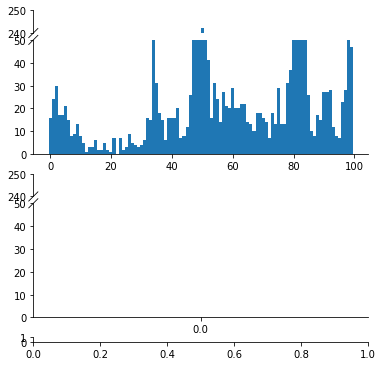

In [59]:
bax1.axs[0].figure

In [57]:
bax1.hist(headscan_pos,bins=lin_binned_bins)

[(array([ 16.,  24.,  30.,  17.,  17.,  21.,  15.,   8.,   9.,  13.,   8.,
           5.,   1.,   3.,   3.,   6.,   2.,   2.,   5.,   2.,   1.,   7.,
           0.,   7.,   2.,   3.,   9.,   5.,   4.,   3.,   4.,   6.,  16.,
          15.,  56.,  31.,  18.,  15.,   6.,  16.,  16.,  16.,  20.,   7.,
           8.,  12.,  26.,  79.,  98., 147., 242., 112.,  41.,  16.,  31.,
          24.,  14.,  27.,  21.,  20.,  29.,  20.,  20.,  22.,  22.,  14.,
          13.,  10.,  18.,  18.,  16.,  14.,   7.,  18.,  13.,  29.,  13.,
          13.,  31.,  37.,  54.,  94., 141.,  78.,  53.,  26.,  10.,   8.,
          17.,  15.,  27.,  27.,  28.,  12.,   8.,   7.,  23.,  28.,  50.,
          47.]),
  array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
         10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
         21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
         32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
        

In [64]:
axs[2].get_position()

Bbox([[0.125, 0.12499999999999978], [0.9, 0.13592092574734793]])

In [69]:
axl.plot(sw_count_div_headscan_count_d[onoff],color='k',label='ratio')

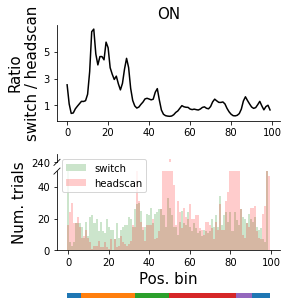

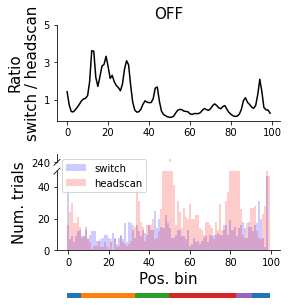

In [99]:
from scipy.ndimage import gaussian_filter1d
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
lin_binned_bins = np.arange(-0.5,100.5,1.)

headscan_pos = headscan_info_all['lin_binned'].values
headscan_ct,_ = np.histogram(headscan_pos,bins=lin_binned_bins)
headscan_ct_smth = gaussian_filter1d(headscan_ct.astype(float),1)
sw_count_div_headscan_count_d = {}
sw_count_per_bin_d = {}

fs=15
onoff_str_d = {1:'ON',-1:'OFF'}
c_l = ['g','b']
for ii,(onoff,c) in enumerate(zip([1,-1],c_l)):
    
    fig = plt.figure(figsize=(4,4.1))
    sps_l,sps,sps_c = GridSpec(3,1,height_ratios=[2,2,0.1])
    ax = bax = brokenaxes(ylims=((0, 50), (240, 245)), hspace=.2,subplot_spec=sps)
    axl = fig.add_subplot(sps_l)
    cax = fig.add_subplot(sps_c)
    
    pos = all_sw_d_all_fam.query('switch==@onoff')['field_pos']
    ct,_ = np.histogram(pos,bins=lin_binned_bins)
    ct_smth = gaussian_filter1d(ct.astype(float),1)
    sw_count_per_bin_d[onoff] = ct
    sw_count_div_headscan_count_d[onoff] = ct_smth / headscan_ct_smth

    ax.hist(pos,bins=lin_binned_bins,color=c,alpha=0.2,label='switch')
    ax.hist(headscan_pos,bins=lin_binned_bins,color='r',alpha=0.2,label='headscan')
    ax.set_ylabel('Num. trials',fontsize=fs)
    ax.axs[1].set_xlabel('Pos. bin',fontsize=fs)    
    
    axl.plot(sw_count_div_headscan_count_d[onoff],color='k',label='ratio')
    axl.set_yticks(range(1,7,2))
    axl.set_ylabel('Ratio\nswitch / headscan',fontsize=fs)
    axl.set_title(onoff_str_d[onoff],fontsize=fs)
    pos1=axl.get_position()
    axl.set_position([pos1.x0,pos1.y0+0.07,pos1.width,pos1.height])
    
    ax.legend(loc='upper left')
    
    ax=cax
    n_segments = len(np.unique(segment_names)) # first and last the same
    for ii,(st,ed) in enumerate(zip(segment_edges[:-1],segment_edges[1:])):    
        ii=ii%n_segments
        ax.axvspan(st,ed,facecolor=f'C{ii}')
    ax.axis('off')
    pos1=ax.get_position()
    ax.set_position([pos1.x0,pos1.y0-0.1,pos1.width,pos1.height])

    fn = f'switch_div_headscan_n_trials_vs_lin_binned_{onoff}.svg'
    fn_full=os.path.join(figdir,fn)
    fig.savefig(fn_full,bbox_inches='tight')


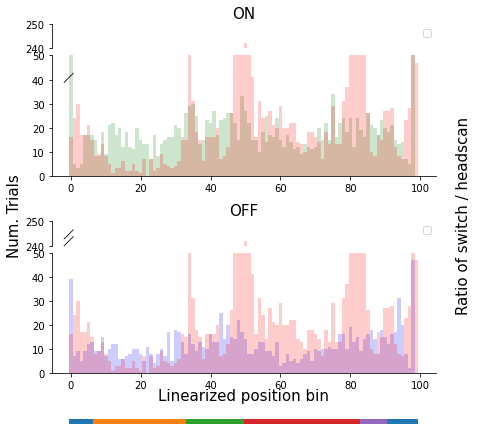

In [47]:
# # old way, no broken axes
# from scipy.ndimage import gaussian_filter1d
# lin_binned_bins = np.arange(-0.5,100.5,1.)

# headscan_pos = headscan_info_all['lin_binned'].values
# headscan_ct,_ = np.histogram(headscan_pos,bins=lin_binned_bins)
# headscan_ct_smth = gaussian_filter1d(headscan_ct.astype(float),1)
# sw_count_div_headscan_count_d = {}
# sw_count_per_bin_d = {}

# fig,axs=plt.subplots(3,1,figsize=(6,6.1),height_ratios=[3,3,0.1])

# fs=15
# onoff_str_d = {1:'ON',-1:'OFF'}
# c_l = ['g','b']
# for ii,(onoff,c) in enumerate(zip([1,-1],c_l)):
#     pos = all_sw_d_all_fam.query('switch==@onoff')['field_pos']
#     ct,_ = np.histogram(pos,bins=lin_binned_bins)
#     ct_smth = gaussian_filter1d(ct.astype(float),1)
#     sw_count_per_bin_d[onoff] = ct
#     sw_count_div_headscan_count_d[onoff] = ct_smth / headscan_ct_smth
#     ax=axs[ii]
#     ax.hist(pos,bins=lin_binned_bins,color=c,alpha=0.2,label='switch')
#     ax.hist(headscan_pos,bins=lin_binned_bins,color='r',alpha=0.2,label='headscan')
#     ax.set_title(onoff_str_d[onoff],fontsize=fs)
    
#     ax2 = ax.twinx()
#     ax2 = ax.axs[0].twinx()
#     ax2.plot(sw_count_div_headscan_count_d[onoff],color='k',label='ratio')
#     ax.legend(loc='upper right')
#     ax2.spines['right'].set_visible(True)
    
#     handles1, labels1 = ax.get_legend_handles_labels()
#     handles2, labels2 = ax2.get_legend_handles_labels()
#     handles = handles1 + handles2
#     labels = labels1 + labels2
#     ax.legend(handles, labels,loc='upper right')




# fig.text(0.,0.5,'Num. Trials',ha='center',va='center',rotation='vertical',fontsize=fs)
# fig.text(1.04,0.5,'Ratio of switch / headscan',ha='center',va='center',rotation='vertical',fontsize=fs)


# ax.set_xlabel('Linearized position bin',fontsize=fs)
# ax=axs[2]
# n_segments = len(np.unique(segment_names)) # first and last the same
# for ii,(st,ed) in enumerate(zip(segment_edges[:-1],segment_edges[1:])):    
#     ii=ii%n_segments
#     ax.axvspan(st,ed,facecolor=f'C{ii}')
# ax.axis('off')
# plt.tight_layout()
    
# fn = 'switch_div_headscan_n_trials_vs_lin_binned.svg'
# fn_full=os.path.join(figdir,fn)
# # fig.savefig(fn_full,bbox_inches='tight')

/tmp/ipykernel_36558/1554796624.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  data= spk_beh_df_all.loc[ani,sess].query('task_index==@task_index')


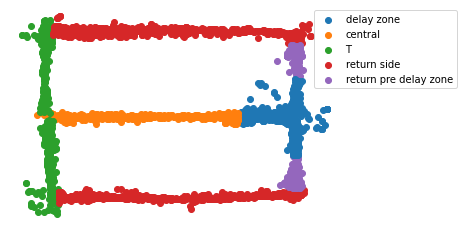

In [100]:
# maze schematic
ani,sess = 'e13_26m1','e13_26m1_210913'
task_index = 0
data= spk_beh_df_all.loc[ani,sess].query('task_index==@task_index')
# data= spk_beh_df_all.query('task_index==@task_index') # use this is slow!!
n_segments = len(np.unique(segment_names)) # first and last the same
fig,ax=plt.subplots()
for ii,(st,ed) in enumerate(zip(segment_edges[:-1],segment_edges[1:])):    
    ii=ii%n_segments
    ma = (data['lin_binned']>=st)&(data['lin_binned']<ed)
    ax.scatter(data.loc[ma]['x'].values[::10],data.loc[ma]['y'].values[::10],c=f'C{ii}',alpha=1)
ax.legend(segment_names[:-1],bbox_to_anchor=[0.9,0.6])
ax.axis('off')

fn = 'maze_arm_colored.svg'
fn_full = os.path.join(figdir,fn)
fig.savefig(fn_full,bbox_inches='tight')

In [ ]:
# reward/error

In [ ]:
ani,sess='e13_26m1','e13_26m1_210913'
spk_beh_df=spk_beh_df_all.loc[(ani,sess),:]
fig,ax=plt.subplots(figsize=(5,3))
changes_df=changes_df_all.loc[ani,sess].dropna(axis=1,how='all')
ax=(changes_df==1).sum(axis=0).plot(marker='o',ms=5.)
correct_per_trial=spk_beh_df.groupby('trial')['correct'].mean()
error_ind=correct_per_trial.index[np.nonzero((correct_per_trial==0).values)[0]]
for et in error_ind:
    line=ax.axvline(et,linestyle='--',c='k',label='error trial')
ax.legend(handles=[line],bbox_to_anchor=[1.05,1])
ax.set(xlabel='Trial',ylabel='Num.\nswitch ON')
sns.despine()
figfn=f'{sess}_nsw_on_vs_trial_with_errortrial'
ph.save_given_name(fig,figfn,figdir='/mnt/home/szheng/ceph/place_variability/fig/paper/figure2')